In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [10]:
csv_path = "../../results/sslvr-action_classification_dataset_size_241221.csv"

In [18]:
df = pd.read_csv(csv_path)
df.dropna(inplace=True)

In [19]:
pd.read_csv(csv_path)

,Method,Dataset,Dataset size,Top-1
0,No pretraining,UCF,1000,43.14
1,SELAVI,UCF,1000,69.18
2,RSPNET,UCF,1000,70.34
3,Video Moco,UCF,1000,65.82
4,Pretext-Contrast,UCF,1000,62.70
...,...,...,...,...
246,Pretext-Contrast,SS,Full,57.00
247,CTP,SS,Full,60.16
248,TCLR,SS,Full,59.64
249,GDT,SS,Full,57.78


### Plot for a single dataset

In [101]:
def lineplot(
        df, x, y,
        ax=None,
        hue="Method",
        style="Method",
        figsize=(10, 8),
        title="Action classification on UCF",
        legend=True,
        titlesize=22,
        labelsize=18,
        legendsize=18,
        tickssize=14,
        palette=["lightgray", "gold", "skyblue", "green", "darkorange", "lightseagreen", "blue", "red", "black"],
        markers=["o" for _ in range(9)],
        ylim=[30, 100],
        save=False,
        show=True,
        ylabel=None,
    ):
    if ax is None:
        fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)

    ax = sns.lineplot(
        data=df,
        x=x,
        y=y,
        hue=hue,
        style=style,
        markers=markers,
        ax=ax,
        linewidth=2.5,
        # linestyle="--",
        palette=palette,
        legend=legend,
    )

    ax.grid()
    ax.set_title(title, fontsize=titlesize)
    
    # ax.set_yscale("log")

    if ylim is not None:
        ax.set_ylim(*ylim)

    # low, high = ylim
    # ax.set_yticks(np.linspace(low, high, 20))
    # yticks = np.logspace(low, high, num=10)
    # ax.set_yticks(yticks)

    if legend:
        ax.legend(fontsize=legendsize)

    ax.yaxis.label.set_size(labelsize)
    ax.xaxis.label.set_size(labelsize)
    
    ax.set_ylabel(ylabel)

    ax.tick_params(axis='x', labelsize=tickssize)
    ax.tick_params(axis='y', labelsize=tickssize)
    
    if save:
        plt.savefig("../../results/plots/action_classification_ucf_datasetsize.pdf", bbox_inches="tight")
    
    if show:
        plt.show()
    
    return ax

### Plot multiple datasets together

In [112]:
def linesubplots(df, ykey="Top-1"):
    datasets = df.Dataset.unique()
    fig, axes = plt.subplots(1, len(datasets), figsize=(20, 5))

    for i in range(len(axes)):
        sub_df = df[df["Dataset"] == datasets[i]].copy()
        # sub_df["Top-1 (Exp)"] = sub_df["Top-1"].apply(lambda x: x)
        # sub_df[f"{ykey} (norm)"] = sub_df.groupby("Dataset size")[[ykey]].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
        # ykey = f"{ykey} (norm)"
        
        ylabel = "Top-1" if i == 0 else None
        legend = True if i == 1 else False

        ax = lineplot(
            sub_df,
            x="Dataset size",
            y=ykey,
            title=datasets[i],
            ax=axes[i],
            legend=legend,
            legendsize=12,
            show=False,
            # ylim=[sub_df[ykey].min() - 5, sub_df[ykey].max() + 5],
            ylim=None,
            # ylim=[sub_df[ykey].min() - 5, 90],
            ylabel=ylabel,
        )

    plt.show()

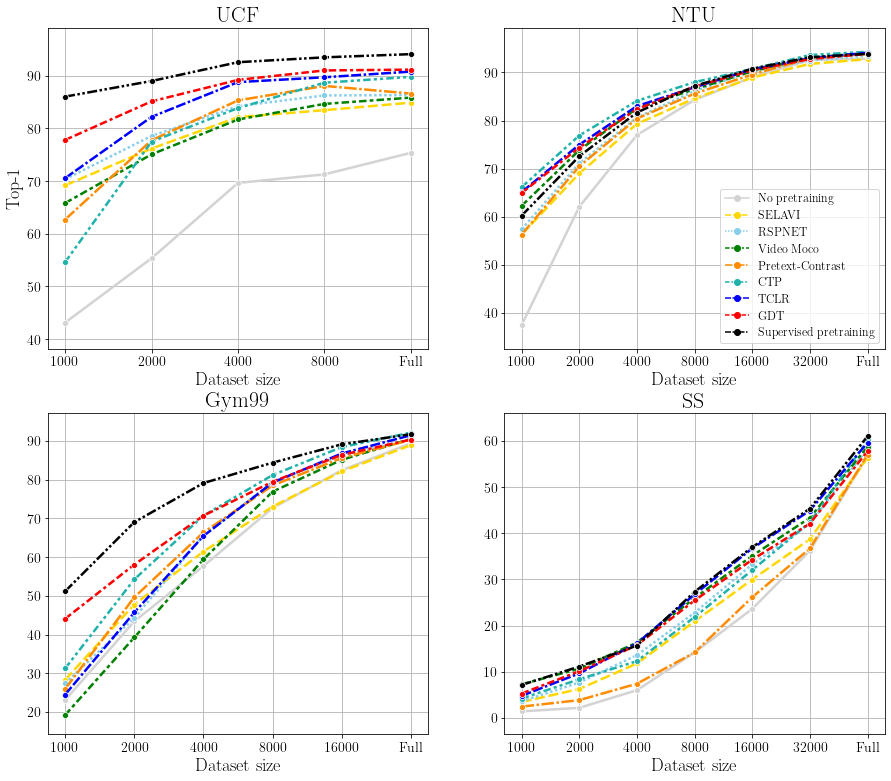

In [120]:
datasets = df.Dataset.unique()
fig, axes = plt.subplots(2, len(datasets) // 2, figsize=(15, 13))

for i in range(len(axes)):
    for j in range(len(axes[i])):
        idx = i * 2 + j
        sub_df = df[df["Dataset"] == datasets[idx]].copy()
        sub_df["Top-1 (Exp)"] = sub_df["Top-1"].apply(lambda x: x)

        ykey = "Top-1"

        ylabel = "Top-1" if idx == 0 else None
        legend = True if idx == 1 else False

        ax = lineplot(
            sub_df,
            x="Dataset size",
            y=ykey,
            title=datasets[idx],
            ax=axes[i, j],
            legend=legend,
            legendsize=12,
            show=False,
            ylim=[sub_df[ykey].min() - 5, sub_df[ykey].max() + 5],
            # ylim=[sub_df[ykey].min() - 5, 90],
            ylabel=ylabel,
        )

plt.show()

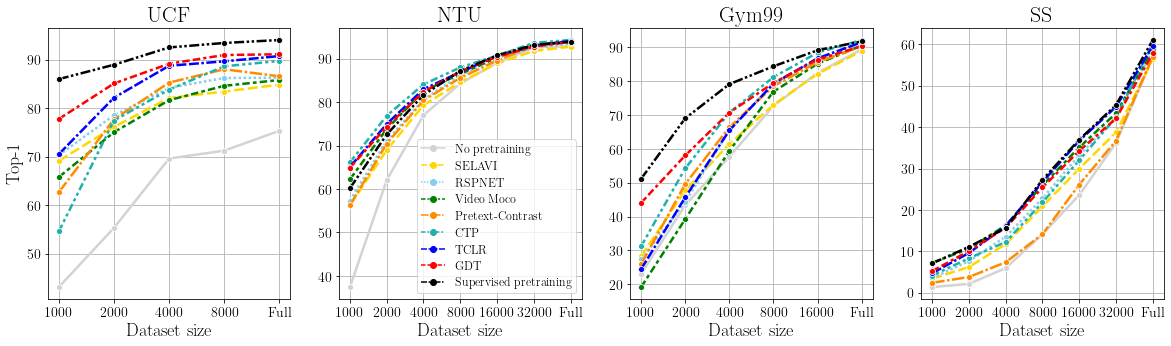

In [114]:
linesubplots(df, "Top-1")

### Plot single dataset

In [8]:
sub_df = df[df["Dataset"] == "UCF"]

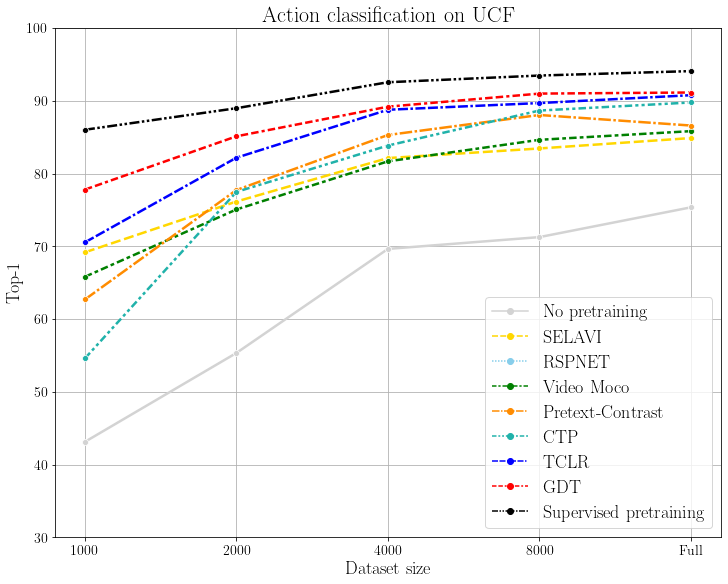

In [9]:
lineplot(sub_df, x="Dataset size", y="Top-1")

In [67]:
sub_df = df[df["Dataset"] == "NTU"]

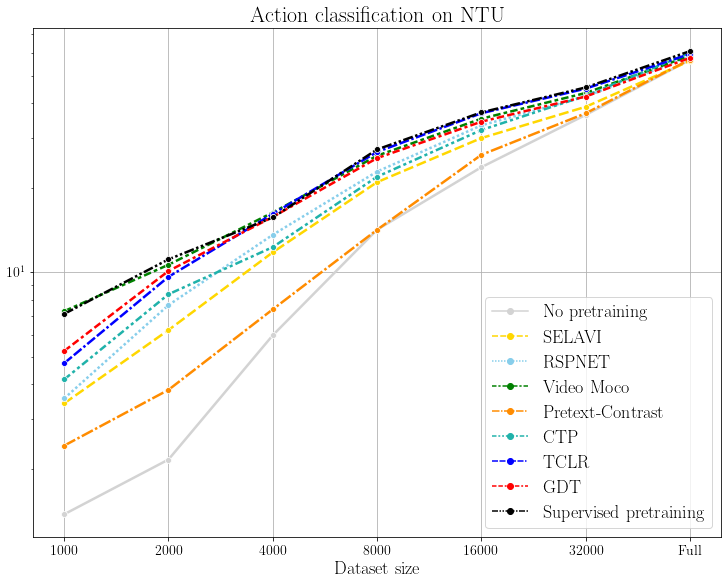

<AxesSubplot:title={'center':'Action classification on NTU'}, xlabel='Dataset size'>

In [71]:
lineplot(sub_df, x="Dataset size", y="Top-1", title="Action classification on NTU")

In [12]:
sub_df = df[df["Dataset"] == "Gym99"]

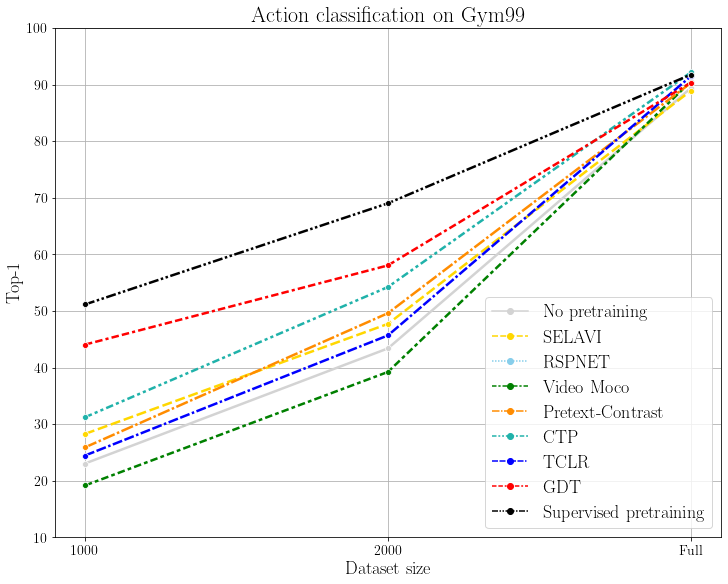

In [13]:
lineplot(sub_df, x="Dataset size", y="Top-1", title="Action classification on Gym99", ylim=[10, 100])

In [15]:
sub_df = df[df["Dataset"] == "SS"]

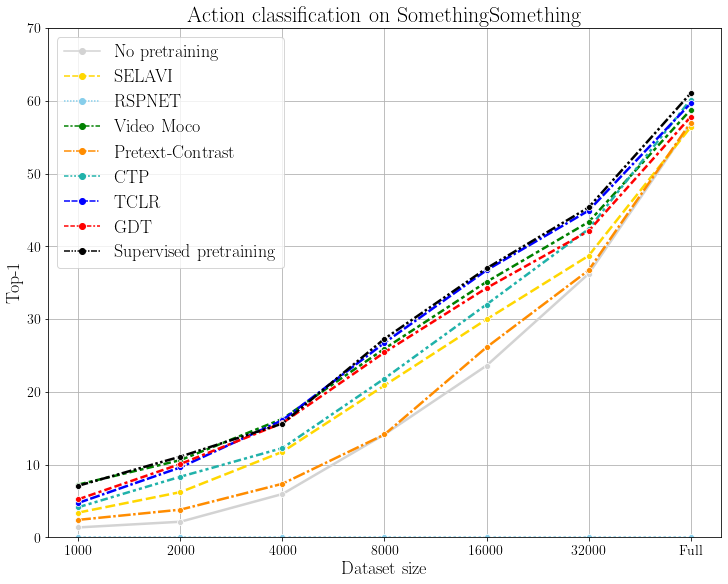

In [18]:
lineplot(sub_df, x="Dataset size", y="Top-1", title="Action classification on SomethingSomething", ylim=[0, 70])